<a href="https://colab.research.google.com/github/nazmicancalik/Dbms/blob/master/random_uniform_mean_diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [166]:
train_images.shape
len(train_labels)
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [167]:
test_images.shape

(10000, 28, 28)

In [168]:
len(test_labels)

10000

Preprocess the data

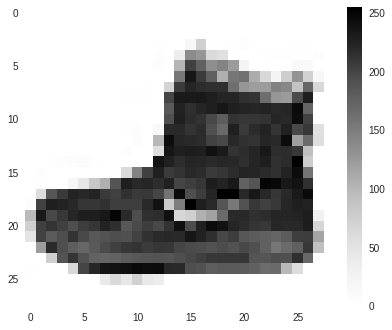

In [169]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Subtract the mean values form each pixel

In [0]:
# This works

train_mean = np.mean(train_images)
test_mean = np.mean(test_images)

old_one = train_images[0]
train_images = np.subtract(train_images , train_mean)
test_images = np.subtract(test_images, test_mean)


Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

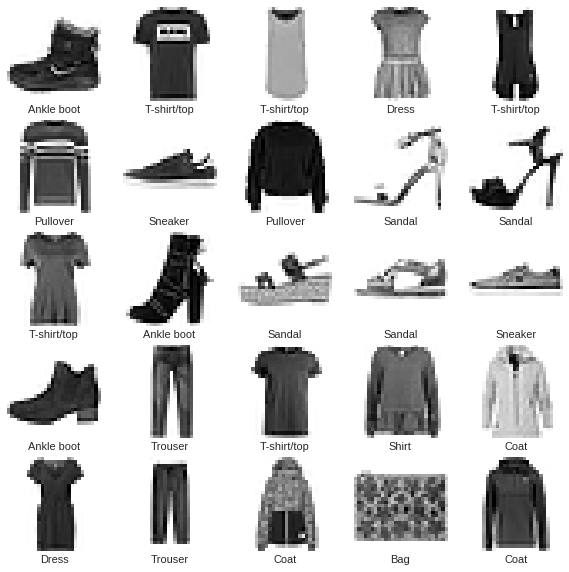

In [172]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

Build the model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu,kernel_initializer='random_uniform'),
    keras.layers.Dense(10, activation=tf.nn.softmax, kernel_initializer='random_uniform')
])

Compile the model

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [175]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.4848 - acc: 0.8257
Epoch 2/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.3581 - acc: 0.8699
Epoch 3/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.3216 - acc: 0.8820
Epoch 4/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.2990 - acc: 0.8897
Epoch 5/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.2801 - acc: 0.8963


In [176]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 49us/step
Test accuracy: 0.8731


In [177]:
predictions = model.predict(test_images)
predictions[0]

np.argmax(predictions[0])
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

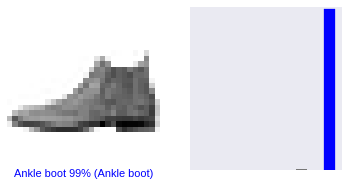

In [179]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

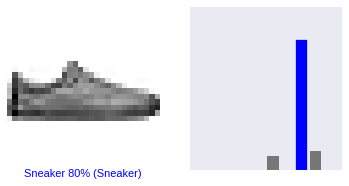

In [180]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

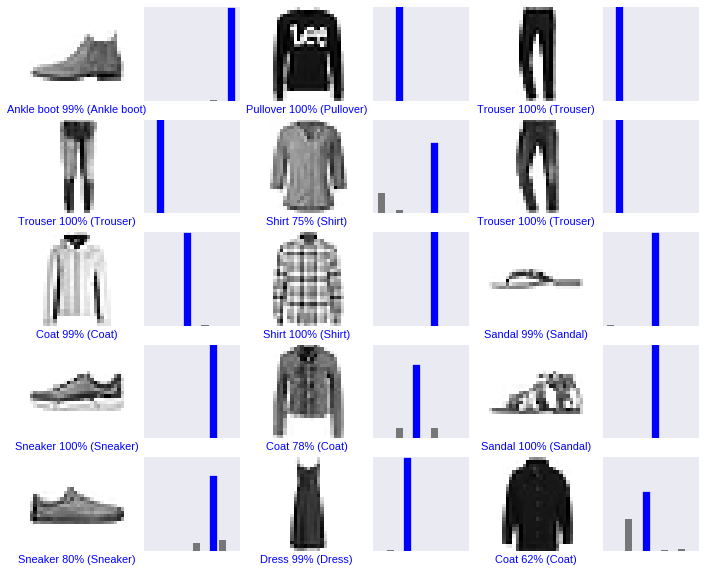

In [181]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [182]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [183]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [184]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.3563030e-06 3.5150379e-06 3.4138221e-08 4.9535174e-07 3.4119733e-08
  3.2809989e-03 2.3241878e-07 8.9171529e-03 1.1957917e-05 9.8778421e-01]]


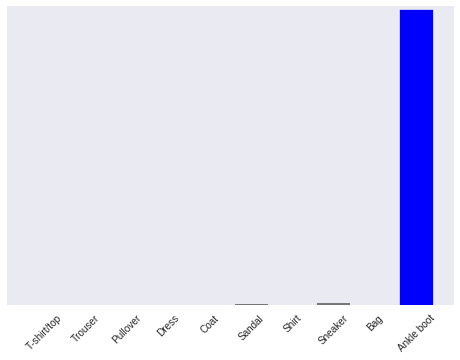

In [185]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [186]:
np.argmax(predictions_single[0])

9